In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = dataset.iloc[:, 3:5].values

In [7]:
from sklearn.cluster import MeanShift
MS = MeanShift(bandwidth=25).fit(x)
y_MS = MS.fit_predict(x)

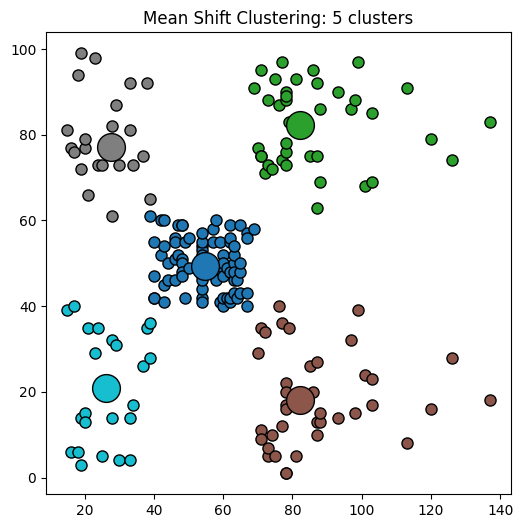

In [8]:
MS = MeanShift(bandwidth=25)
y_MS = MS.fit_predict(x)
cluster_centers = MS.cluster_centers_

# Number of clusters
labels = MS.labels_
n_clusters = len(np.unique(labels))

# Plot
plt.figure(figsize=(6,6))
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))

for k, col in zip(range(n_clusters), colors):
    class_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    # Plot all points in cluster
    plt.plot(x[class_members, 0], x[class_members, 1], 'o',
             markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)
    
    # Mark cluster center
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=20)

plt.title(f"Mean Shift Clustering: {n_clusters} clusters")
plt.show()